# Understanding  Bussiness Case

### Create a predictive model to classify whether a person is running or walking based on the given predictor variables.

# Domain Analysis

### 1. **date**: 
   - **Domain**: This attribute represents the date on which the sensor readings were recorded.
   - **Format**: Typically in a standard date format like YYYY-MM-DD.

2. **time**: 
   - **Domain**: This attribute indicates the specific time at which the sensor data was captured.
   - **Format**: Usually in a format such as HH:MM:SS (hours, minutes, seconds) or a timestamp format.

3. **username**: 
   - **Domain**: This attribute identifies the individual who was performing the activity. It could be a unique identifier or a username.
   - **Format**: It can be alphanumeric, including letters, numbers, and possibly special characters.

4. **wrist**: 
   - **Domain**: This attribute indicates the wrist on which the sensor was worn. It typically identifies which wrist (e.g., left or right).
   - **Format**: Categorical values such as "left" or "right" and numrical values as 0 and 1.

5. **activity**: 
   - **Domain**: This attribute describes the type of activity the user was performing during the sensor data capture.
   - **Format**: Categorical values representing different activities (e.g., "walking", "running", "sitting", "standing").

6. **acceleration_x**: 
   - **Domain**: This attribute represents the acceleration measured along the x-axis of the sensor.
   - **Format**: Numeric values, often in units like meters per second squared (m/s²).

7. **acceleration_y**: 
   - **Domain**: This attribute represents the acceleration measured along the y-axis of the sensor.
   - **Format**: Numeric values, usually in units like meters per second squared (m/s²).

8. **acceleration_z**: 
   - **Domain**: This attribute represents the acceleration measured along the z-axis of the sensor.
   - **Format**: Numeric values, typically in units like meters per second squared (m/s²).

9. **gyro_x**: 
   - **Domain**: This attribute captures the gyroscopic rotation rate around the x-axis.
   - **Format**: Numeric values, often in units like degrees per second (°/s) or radians per second (rad/s).

10. **gyro_y**: 
    - **Domain**: This attribute captures the gyroscopic rotation rate around the y-axis.
    - **Format**: Numeric values, commonly in units like degrees per second (°/s) or radians per second (rad/s).

11. **gyro_z**: 
    - **Domain**: This attribute captures the gyroscopic rotation rate around the z-axis.
    - **Format**: Numeric values, generally in units like degrees per second (°/s) or radians per second (rad/s).

Overall, these attributes provide a comprehensive view of the motion data collected during various activities, combining temporal information, user identification, activity types, and detailed sensor readings.

# Basic Checks

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy import stats

In [97]:
warnings.filterwarnings('ignore')

In [98]:
df = pd.read_csv('walkrun.csv')
df

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [100]:
for i in df:
    print(i,':',df[i].unique())
    print('====================================================================================================')

date : ['2017-6-30' '2017-7-10' '2017-7-11' '2017-7-15' '2017-7-16' '2017-7-17'
 '2017-7-1' '2017-7-2' '2017-7-4' '2017-7-6' '2017-7-7' '2017-7-9']
time : ['13:51:15:847724020' '13:51:16:246945023' '13:51:16:446233987' ...
 '20:9:15:717828989' '20:9:15:917932987' '20:9:16:117410004']
username : ['viktor']
wrist : [0 1]
activity : [0 1]
acceleration_x : [0.265  0.6722 0.4399 ... 0.5671 0.6287 0.4478]
acceleration_y : [-0.7814 -1.1233 -1.4817 ... -1.4259 -1.4467 -1.4213]
acceleration_z : [-0.0076 -0.2344  0.0722 ... -0.5238 -0.0154 -0.5407]
gyro_x : [-0.059  -0.1757 -0.9105 ...  0.5324 -1.45    0.1183]
gyro_y : [ 0.0325  0.0208  0.1063 ... -0.9116  2.0124 -1.2565]
gyro_z : [-2.9296  0.1269 -2.4367 ... -1.0889  2.5342  0.6048]


In [101]:
df.activity.unique()

array([0, 1], dtype=int64)

In [102]:
df.wrist.unique()

array([0, 1], dtype=int64)

In [103]:
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [104]:
df.describe(include='O')


,date,time,username
count,88588,88588,88588
unique,12,88588,1
top,2017-7-16,13:51:15:847724020,viktor
freq,20480,1,88588


# EDA

### Univariate Analysis

In [105]:

for i in df:
    if(df[i].dtype=='object')and(len(df[i].unique())<=20):
        print(i,':',df[i].unique())
        
        print('================================================================================')


date : ['2017-6-30' '2017-7-10' '2017-7-11' '2017-7-15' '2017-7-16' '2017-7-17'
 '2017-7-1' '2017-7-2' '2017-7-4' '2017-7-6' '2017-7-7' '2017-7-9']
username : ['viktor']


In [106]:
list_cat=['username','date']

In [107]:
list_cat

['username', 'date']

In [108]:
list_cat=df[list_cat]

In [109]:
type(list_cat)

pandas.core.frame.DataFrame

In [110]:
list_num=[]
for i in df:
    if(df[i].dtype!='object')and(len(df[i].unique())>20):
        list_num.append(i)
list_num.append('wrist')

In [111]:
list_num

['acceleration_x',
 'acceleration_y',
 'acceleration_z',
 'gyro_x',
 'gyro_y',
 'gyro_z',
 'wrist']

In [112]:
list_num=df[list_num]

In [113]:
type(list_num)

pandas.core.frame.DataFrame

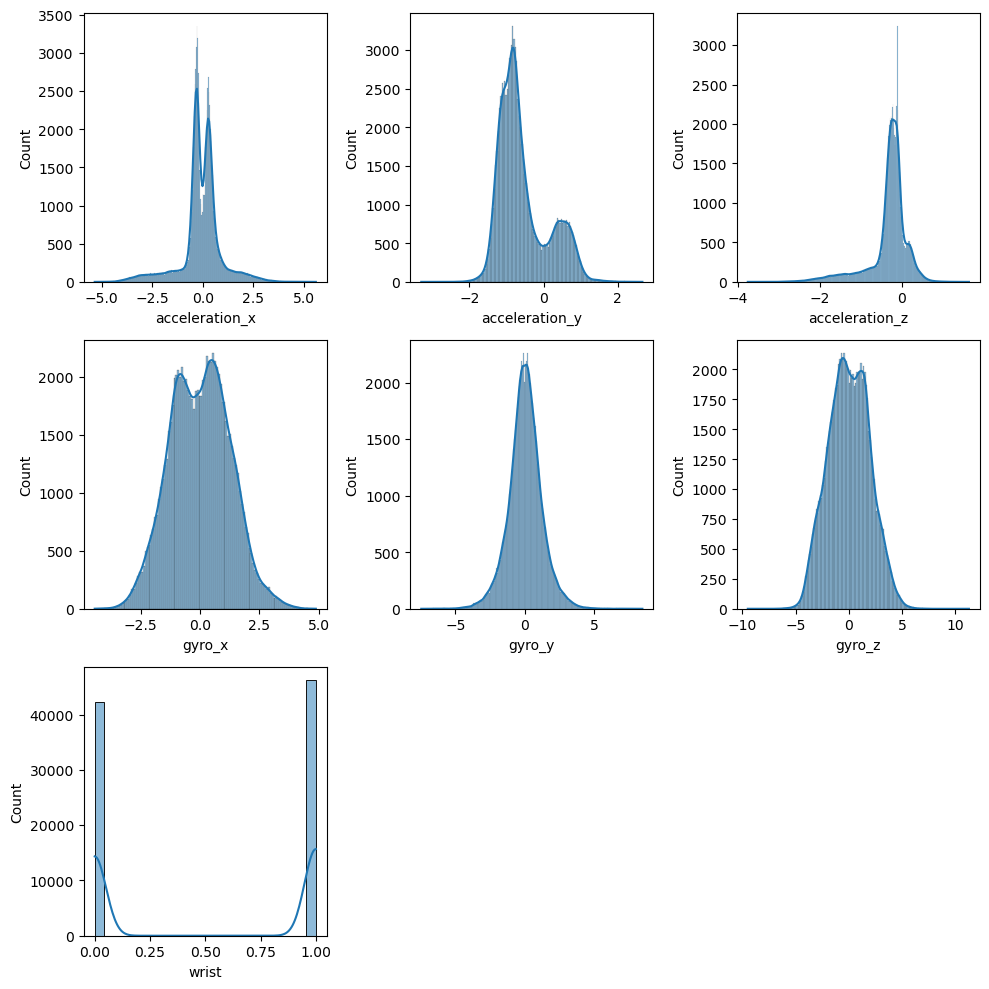

In [114]:
plt.figure(figsize=(10,10))
plotnumber=1
for i in list_num:
    plt.subplot(3,3,plotnumber)
    sns.histplot(x=list_num[i],kde=True)
    plotnumber=plotnumber+1
plt.tight_layout()

## Insights:
#### acceleration_x: 
nearly 70 percent data points lies between -1 to 1 ,Skewness: The distribution is heavily skewed to the right, indicating that there are more extreme values (likely higher accelerations) on the right side of the distribution.
 * Peak: The peak of the distribution is around 0, suggesting that the most frequent acceleration values are close to zero.
 * Range: The acceleration values span a fairly wide range, from approximately -5 to 5.

#### acceleration_y:
* Skewness: The distribution is significantly skewed to the right, indicating that there are more data points with higher acceleration_y values compared to lower ones.
 * Modality: The histogram appears to be bimodal, suggesting there might be two distinct groups or clusters within the data. One cluster is centered around a lower acceleration_y value, while the other is centered around a higher value.
Central Tendency and Dispersion:
 * Mean: Since the distribution is skewed to the right, the mean will be greater than the median.
 * Data Outliers: The tail on the right side of the histogram might indicate outliers or unusual events that are not representative of the typical behavior.

#### acceleration_z:
* A histogram of the acceleration in the z-direction. The x-axis represents the acceleration values, and the y-axis represents the count of occurrences of each value. The histogram shows a clear peak around 0, indicating that most of the acceleration values are close to 0. There are also some smaller peaks at around -2 and 2, suggesting that there are some acceleration values in both positive and negative directions. Overall, the distribution of acceleration values appears to be centered around 0 with a relatively narrow spread.

#### gyro_x:
 * Distribution: The data is approximately normally distributed, with a peak around 0. This suggests that the gyroscope x-axis values are centered around 0, with most values falling within a certain range.
 * Range: The range of the data is approximately from -2.5 to 5.0. This indicates the maximum and minimum values observed in the gyroscope x-axis data.
 *  Spread: The spread of the data can be assessed by looking at the width of the distribution. A narrower distribution indicates that the data points are more tightly clustered around the mean, while a wider distribution suggests that the data points are more spread out. In this case, the distribution appears to be moderately spread out.
 * Symmetry: The distribution appears to be roughly symmetric around the mean, indicating that there is no significant bias in the data.

#### gyro_y:
1. Normal Distribution:
 * Shape: The distribution closely resembles a normal (Gaussian) distribution, characterized by a bell-shaped curve.
 * Central Tendency: The peak of the distribution, likely representing the mean or median of the data, is around 0. This suggests that the gyroscope's Y-axis readings are centered around zero.
2. Data Range:
 * Minimum and Maximum Values: The x-axis labels (-5 to 5) likely represent the range of gyroscope Y-axis values observed in the data.
 * Outliers: There appear to be no significant outliers or extreme values beyond the range of the distribution, indicating that the data is relatively consistent.

#### gyro_z:
 * Distribution Shape: The histogram exhibits a bell-curve shape, characteristic of a normal distribution. This suggests that the majority of "gyro_z" values cluster around a central point, with fewer values occurring at the extremes.
 * Central Tendency: The peak of the distribution appears to be around 0, indicating that this is the most common value for "gyro_z."
 * Spread: The width of the distribution, or the spread of values, seems relatively narrow. This suggests that the data points are clustered closely together around the central value, with less variability.
 * Outliers: There are no visible outliers, which are extreme values that deviate significantly from the majority of the data.

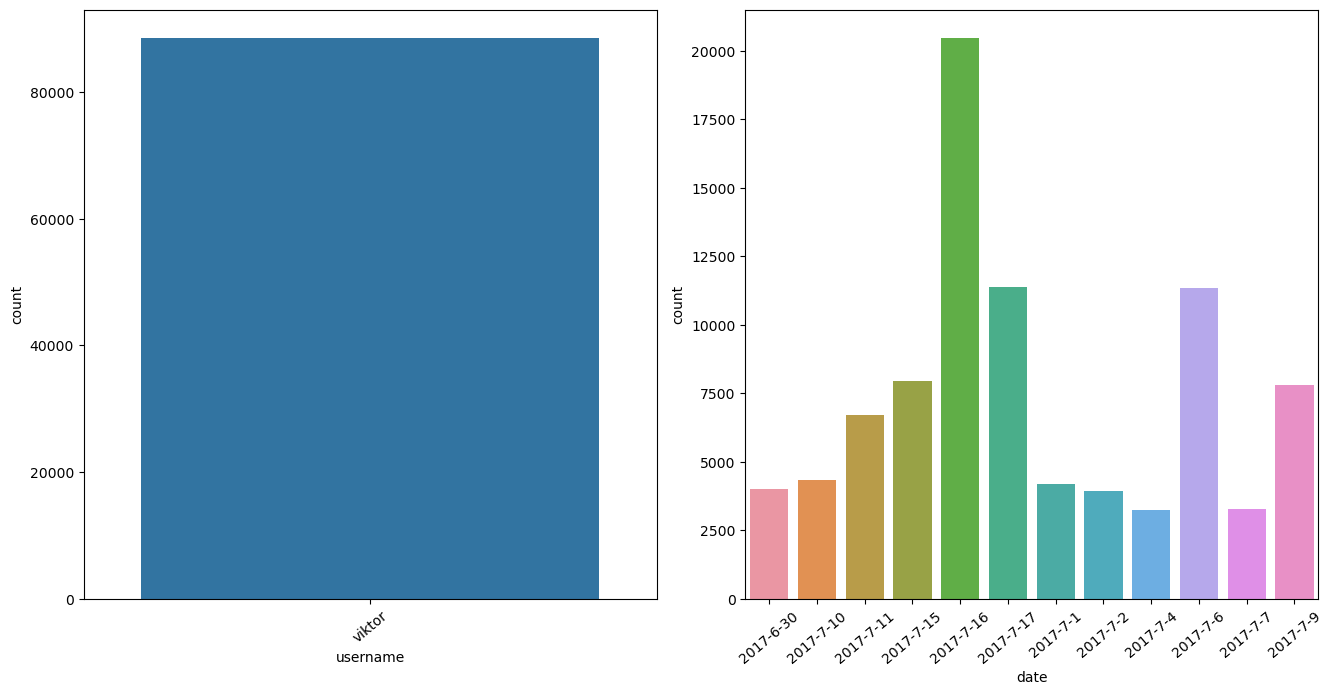

In [115]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in list_cat:
    plt.subplot(3,3,plotnumber)
    sns.countplot(x=list_cat[i])
    plt.xticks(rotation=40)
    plotnumber=plotnumber+1
plt.tight_layout()

## insights:

#### username:
* Single Data Point: The chart only displays one data point, which is the count associated with the username "viktor."

#### date:
 * Time Period: The x-axis is labeled "date," ranging from June 30, 2017 to July 9, 2017.
 * Count: The y-axis is labeled "count," indicating the quantity of events or occurrences.
 * Trend: There seems to be a general upward trend in the count from June 30th to July 1st, followed by a significant spike on July 2nd and then a gradual decline until July 9th.
 * Peak: The highest count occurs on July 16th, with a value of around 20,000.
 * Variability: The counts vary significantly from day to day, with some days having very high counts and others having relatively low counts.

### Bivariate Anaysis

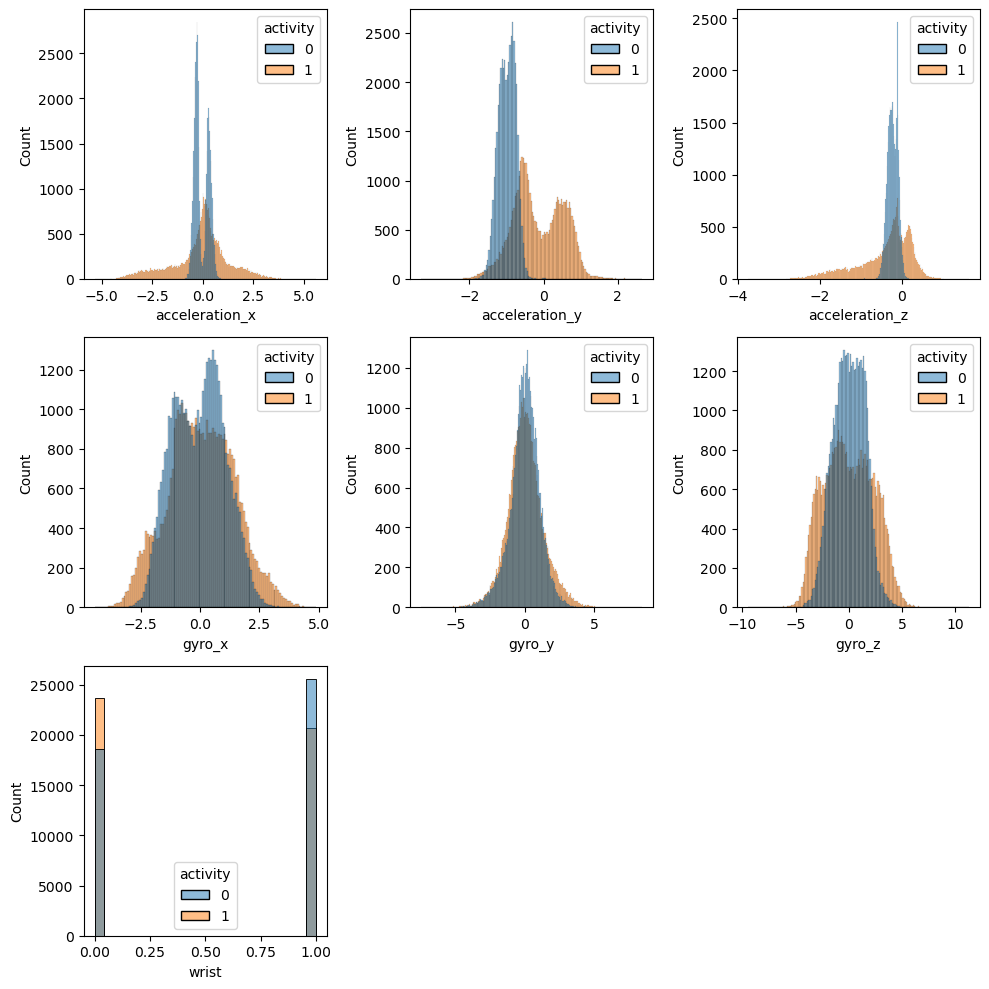

In [116]:
plt.figure(figsize=(10,10))
plotnumber=1
for i in list_num:
    plt.subplot(3,3,plotnumber)
    sns.histplot(x=list_num[i],hue=df.activity)
    plotnumber=plotnumber+1
plt.tight_layout()

## insights:

#### acceleration_x:
histogram showing the distribution of acceleration_x values for two different activity : "0" and "1". The x-axis represents acceleration_x, while the y-axis represents the count of occurrences.
Key Observations:
 * Activity  0: The blue histogram likely represents the acceleration_x values for activity 0. It is centered around 0 with a relatively narrow spread, suggesting that the acceleration values for this level are generally close to 0.
 * Activity  1: The orange histogram likely represents the acceleration_x values for activity  1. It is centered slightly to the right of 0 with a wider spread, indicating that the acceleration values for this  are more variable and tend to be higher than those for  0.
 * Overlapping Distributions: There is some overlap between the two distributions, suggesting that there might be some overlap in acceleration values between the two activity . However, the overall shape and center of the distributions are distinct.
Possible Interpretations for Walking and Running:
 * Activity 0: Walking: Given the narrower distribution and center around 0, activity 0 could represent walking. Walking typically involves less intense acceleration compared to running.
 * Activity  1: Running: The wider distribution and shift to the right of 0 suggest that activity level 1 could represent running. Running involves more intense acceleration, with greater fluctuations in acceleration values.
Additional Considerations:

#### acceleration_y:
1)we have total 88588 datapoints among them highest point have in acceleration_y  is '1'having percentage of 52.69+-3%.  
2)In acceleration_y  nearly '40.48' +-3% have '0' value .   
3)overlapping of data is neraly 6.63 percentage of data points    
4)where data is randomly distributed but we can say that highest  point lies between -0.1 to -1.7 range having value 0.    
#### acceleration_z:
1)overlapping lies between -0.5 to 0.1 and also  having highest count bar  in this range.   
2)-0.5 to -2.7 & postive side 0.11 to 1.1 having '1' is highest count  
3) 0 value lies in between  -0.5 to 0.1 with highest count    
4)'1' having highest percentage of datapoints  in acceleration_z  which is count'39652' with precentage '44.80'.  
3)'0'having 2 nd highest percentage of datapoints in acceleration_z which is count '34180' with percentage '38.60'.   
5)overlapping value having count of '14756' which is nearly '16.60 'percent    
6)data is negatively skewd most  of data points lies on left side .   


#### gyro_x:
1)datapoints are little bit normally distributed most of values overlaped on each other .     
2) '1' have value count about 11.42 percentage having values '10115'    
3)'0' have nearly 12.99 percentage with values 11500    
4) 77.60 percent value lies between -2.7 to 2.7 all values are overlapped  having count 66973.     

#### gyro_y:
1) gyro_y is kurtosis data pickness is very high and pointed .  
2) overlappped datapoints have highest value nearly '93%' having count '82387'
3) '0' value have value count '3570' in percentage '4.03'
4) '1' have value count '2631' with '2.97' percent
5) gyro_y value lies between -5 to 5  .
   
#### gyro_z:
1) gyro_z is kurtosis data pickness is very high and pointed .
2) overlapped datapoints have higest value nearly '83.09' percent
3) '0' have value count '6620' and in percentage is '7.47'.
4) '1' have value count '8360' and in percentage is '9.44'
5) pickness of  data is very high
6) values lies between -6  to 6.



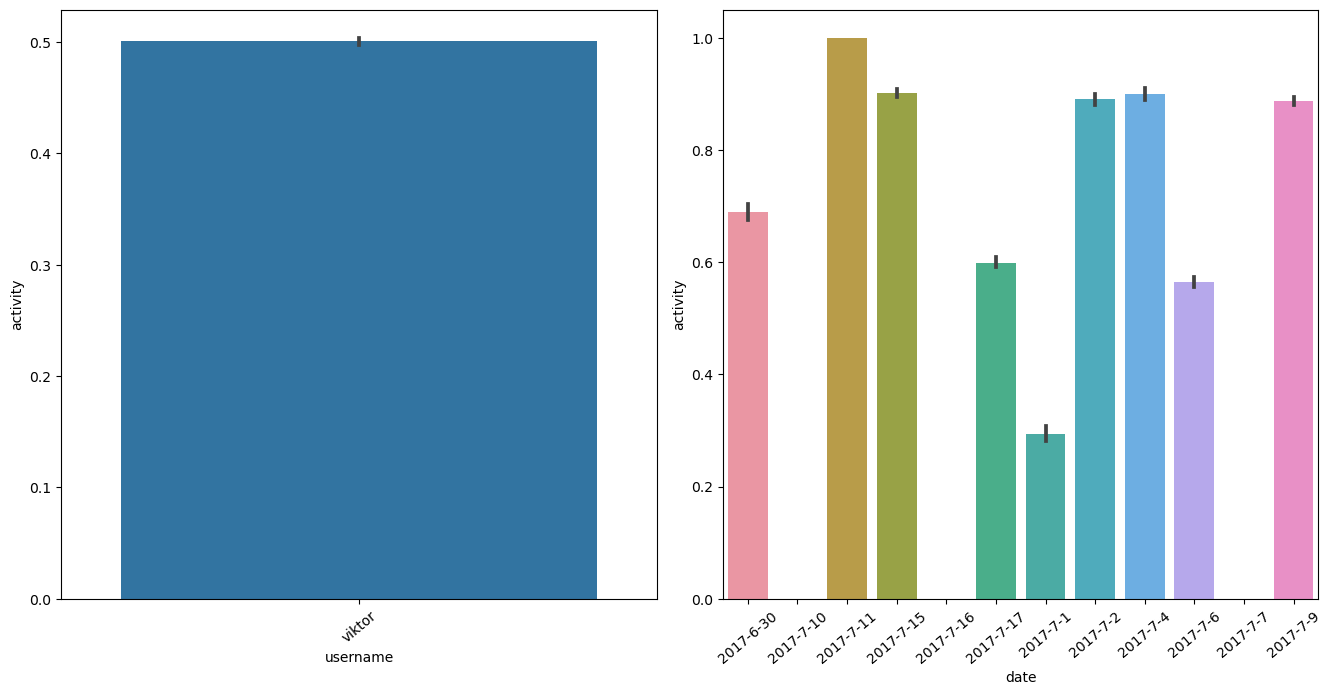

In [117]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in list_cat:
    plt.subplot(3,3,plotnumber)
    sns.barplot(x=list_cat[i],y=df.activity)
    plt.xticks(rotation=40)
    plotnumber=plotnumber+1
plt.tight_layout()

## Insights
#### Username:
There is no insights for this feature because column is singleton column  contains only one value that is 'viktor'  
#### date:
1)highest value for activity in date is on 2017-7-11   
2)  2017-7-7, 2017-7-16  and  2017-7-10 have  lowest value that is '0'     

# Data Preprocessing 

## 1)Handling With Null Values Corrupted Data :
 

In [118]:
df.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

## 2) Handling with Outliers :

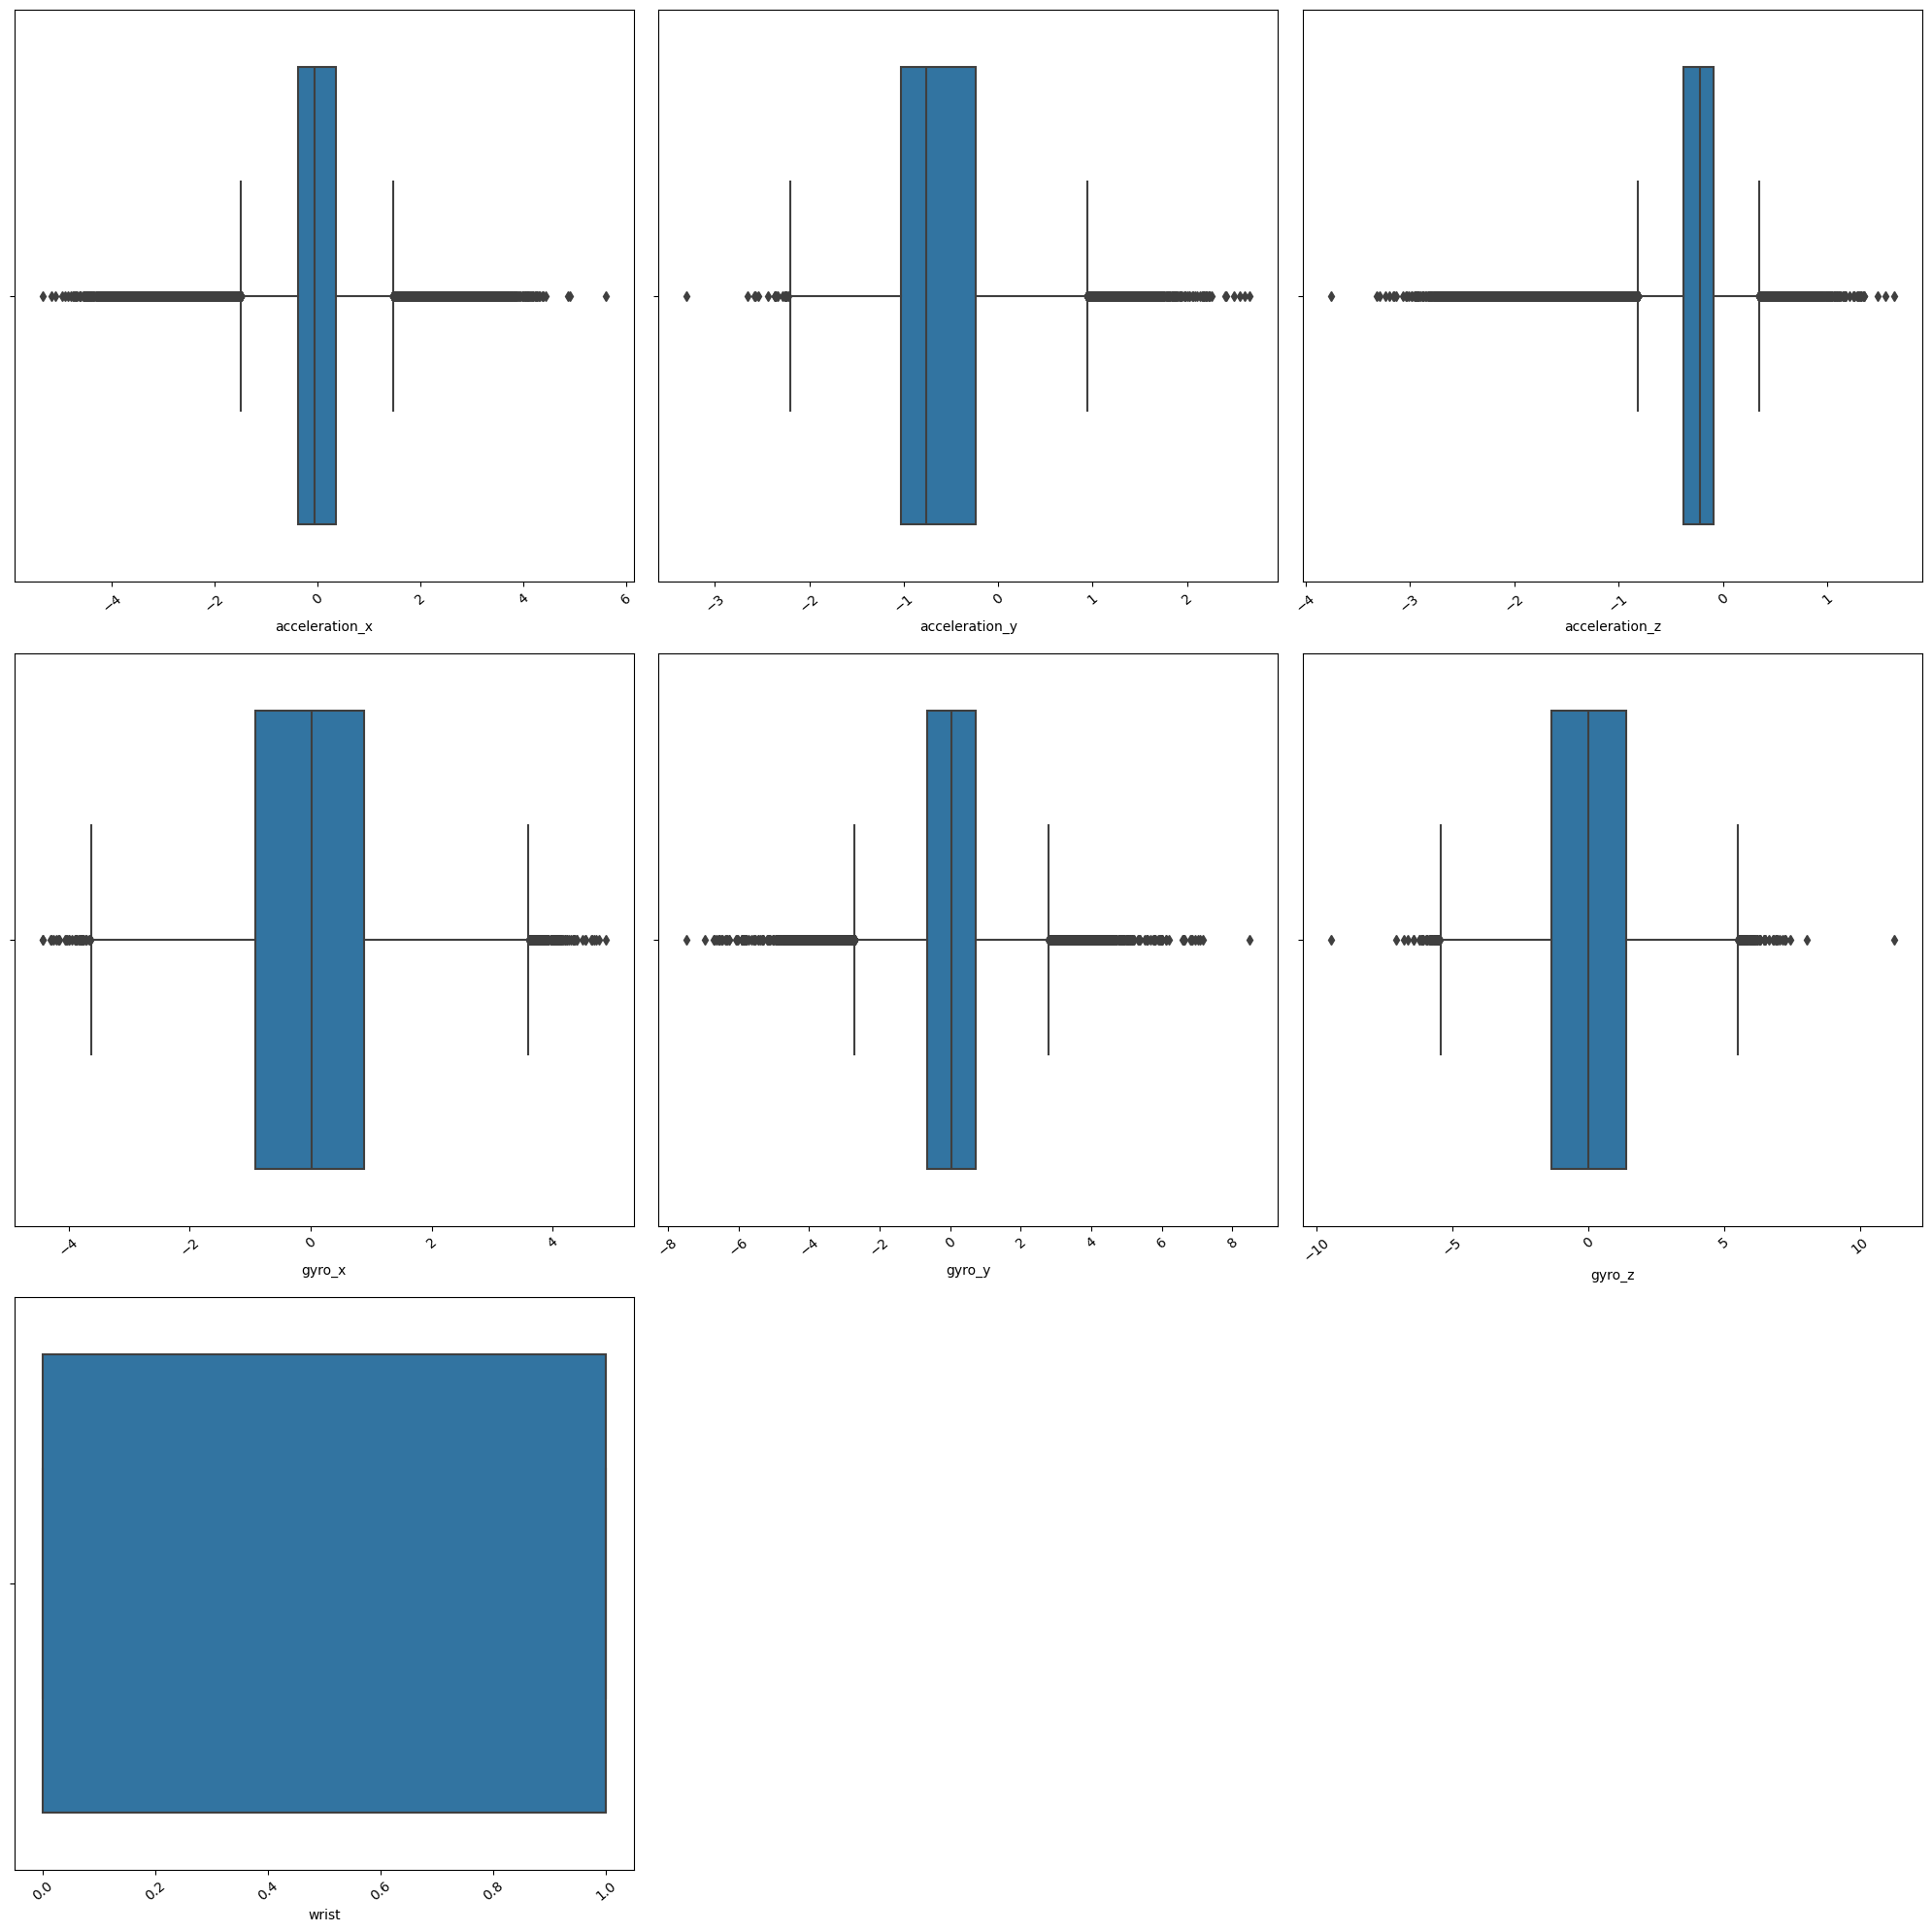

In [119]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in list_num:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(x=list_num[i])
    plt.xticks(rotation=40)
    plotnumber=plotnumber+1
plt.tight_layout()

## acceleration_x

In [120]:
df.loc[df.acceleration_x>4.5]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
69868,2017-7-6,18:38:26:242500007,viktor,0,1,4.9068,-1.4043,0.1646,2.0731,-1.4541,-2.5862
80812,2017-7-9,19:41:46:806110978,viktor,0,1,4.8701,-1.7447,-1.0217,0.2092,-0.9031,-4.0232
80820,2017-7-9,19:41:48:405888974,viktor,0,1,5.6033,-0.7026,-1.0155,0.4934,-1.7109,-3.2481


In [121]:
np.median(df.acceleration_x)

-0.0595

In [122]:
df.loc[df.acceleration_x>4.5,'acceleration_x']=np.median(df.acceleration_x)

In [123]:
df.loc[df.acceleration_x>4.5]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z


<Axes: xlabel='acceleration_x'>

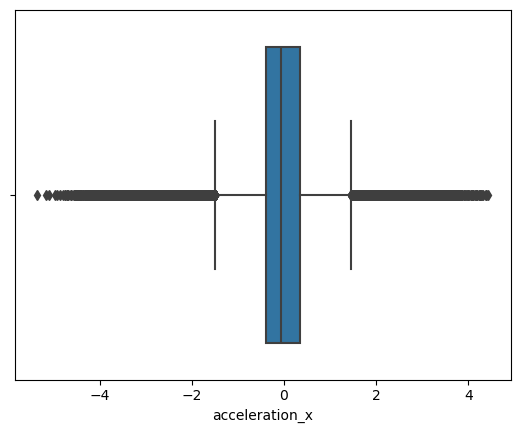

In [124]:
sns.boxplot(x=df.acceleration_x)

# acceleration_y

In [125]:
df.loc[df.acceleration_y>2.5] 

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
13247,2017-7-11,18:0:27:466082990,viktor,1,1,-4.0214,2.6077,-0.0979,1.9529,2.1503,5.2968
16957,2017-7-15,18:15:57:238979995,viktor,1,1,-3.9246,2.6680,0.9531,4.3962,0.3314,3.0782
50772,2017-7-17,20:11:31:86305975,viktor,1,1,-3.3178,2.5023,0.4613,3.5960,1.7834,1.7587
53789,2017-7-17,20:6:46:884745001,viktor,1,1,-2.4926,2.5646,-0.3890,1.8578,-3.2461,1.6484


In [126]:
np.median(df.acceleration_y)

-0.7591

In [127]:
df.loc[df.acceleration_y>2.5,'acceleration_y'] =np.median(df.acceleration_y)

In [128]:
df.loc[df.acceleration_y>2.5] 

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z


In [129]:
df.loc[df.acceleration_y<-3] 

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
10216,2017-7-11,17:49:58:745341002,viktor,1,1,-2.2993,-3.299,-0.0016,-1.0608,-1.2019,-0.0761


In [130]:
df.loc[df.acceleration_y<-3,'acceleration_y']=np.median(df.acceleration_y) 

<Axes: xlabel='acceleration_y'>

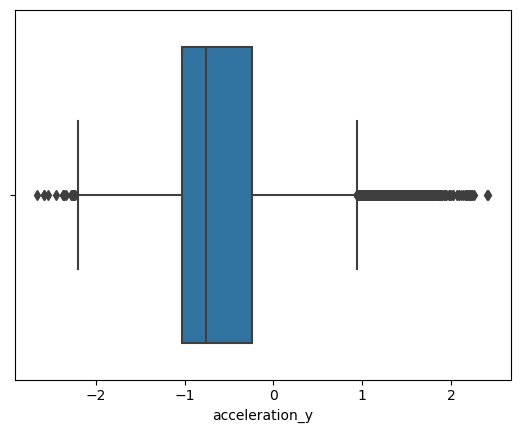

In [131]:
sns.boxplot(x=df.acceleration_y)

## acceleration_z

In [132]:
df.loc[df.acceleration_z>1.4]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
10214,2017-7-11,17:49:58:345283985,viktor,1,1,-1.8703,-2.2693,1.6403,0.6478,0.4910,-0.9244
16991,2017-7-15,18:16:14:236518025,viktor,1,1,-3.3913,0.3715,1.4793,3.6414,-5.3915,1.9396
22951,2017-7-15,18:10:0:635991990,viktor,1,1,-2.8685,0.3254,1.5579,3.2452,4.0601,1.2455


In [133]:
df.loc[df.acceleration_z<-3]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
65341,2017-7-4,19:42:35:947318971,viktor,0,1,2.2468,-1.5523,-3.1565,-0.8482,-2.2246,-2.6764
65583,2017-7-4,19:43:59:744345009,viktor,0,1,1.9407,-1.4691,-3.2869,1.8213,0.4633,4.5484
65644,2017-7-4,19:44:19:62515974,viktor,0,1,1.7755,-1.8382,-3.1511,1.4920,3.5038,3.2123
65650,2017-7-4,19:44:20:262511014,viktor,0,1,2.7332,-1.1192,-3.7538,-2.1515,-0.3647,-2.4124
65677,2017-7-4,19:44:31:863961994,viktor,0,1,2.2620,-0.5299,-3.0610,-1.5049,-0.3771,-3.0382
65723,2017-7-4,19:44:41:63968002,viktor,0,1,2.6707,-0.0652,-3.3174,0.6828,-0.5049,-4.0308
65729,2017-7-4,19:44:42:264015018,viktor,0,1,1.8672,-1.0768,-3.2317,1.4574,-0.7688,2.9692
65738,2017-7-4,19:45:17:412850022,viktor,0,1,2.3979,-2.1205,-3.1262,2.9746,0.9984,3.4222
65740,2017-7-4,19:45:17:812012970,viktor,0,1,2.6707,-0.2812,-3.0256,-0.6742,-2.0233,-1.6760
65744,2017-7-4,19:45:18:612944006,viktor,0,1,2.2126,-0.1177,-3.0059,-0.7623,-0.8527,-3.7688


In [134]:
np.median(df.acceleration_z)

-0.221

In [135]:
df.loc[df.acceleration_z>1.4,'acceleration_z']=np.median(df.acceleration_z)

In [136]:
df.loc[df.acceleration_z<-3,'acceleration_z']=np.median(df.acceleration_z)

<Axes: xlabel='acceleration_z'>

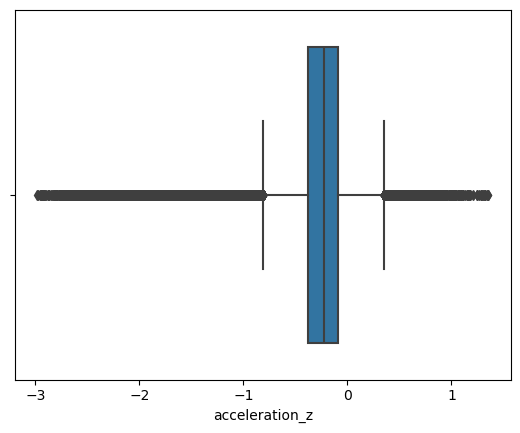

In [137]:
sns.boxplot(x=df.acceleration_z)

## gyro_x

In [138]:
df.loc[df.gyro_x>4.7]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
16514,2017-7-15,18:14:6:838312983,viktor,1,1,-2.9780,-0.3384,0.4266,4.7143,-0.1152,2.1425
50227,2017-7-17,20:0:39:885653018,viktor,1,1,-3.3781,0.5337,0.3598,4.8742,-1.1503,3.6753
81715,2017-7-9,19:44:51:4975974,viktor,0,1,-2.1931,1.8160,-0.6282,4.7617,-5.1590,6.3087


In [139]:
df.loc[df.gyro_x<-4.5]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z


In [140]:
np.median(df.gyro_x)

0.0187

In [141]:
df.loc[df.gyro_x>4.7,'gyro_x']=np.median(df.gyro_x)

<Axes: xlabel='gyro_x'>

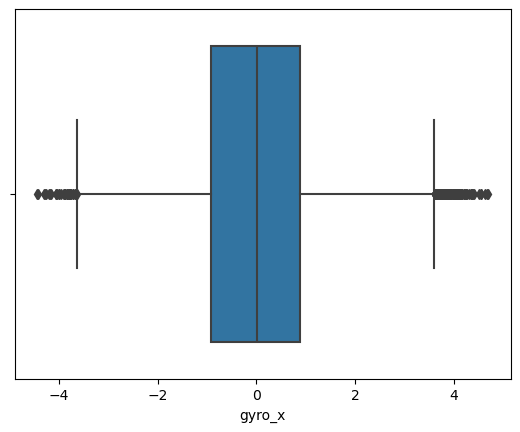

In [142]:
sns.boxplot(x=df.gyro_x)

## gyro_y

In [143]:
df.loc[df.gyro_y>7.6]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
50565,2017-7-17,20:10:48:883203983,viktor,1,1,-1.6804,-0.5104,-0.0896,2.6969,8.498,0.3771


In [144]:
df.loc[df.gyro_y<-6.6]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
13548,2017-7-11,18:1:28:865957975,viktor,1,1,-3.6288,-0.4976,-0.0995,-3.7646,-6.9557,-1.7011
16059,2017-7-15,18:12:54:37804007,viktor,1,1,0.3054,0.2845,0.1541,2.7971,-6.6781,3.2144
19043,2017-7-15,18:23:34:321889996,viktor,1,1,-0.9981,-0.5816,-0.4845,-2.7116,-6.6332,-6.6676
47646,2017-7-17,16:6:0:953980982,viktor,0,0,0.8632,-1.1037,0.0037,-0.9582,-6.6959,-4.1244
52530,2017-7-17,20:2:29:882893025,viktor,1,1,-0.5693,0.2547,0.2425,1.1462,-7.4647,1.5915


In [145]:
np.median(df.gyro_y)

0.0393

In [146]:
df.loc[df.gyro_y<-6.6 ,'gyro_y']=np.median(df.gyro_y)

In [147]:
df.loc[df.gyro_y>7.6 ,'gyro_y']=np.median(df.gyro_y)

<Axes: xlabel='gyro_y'>

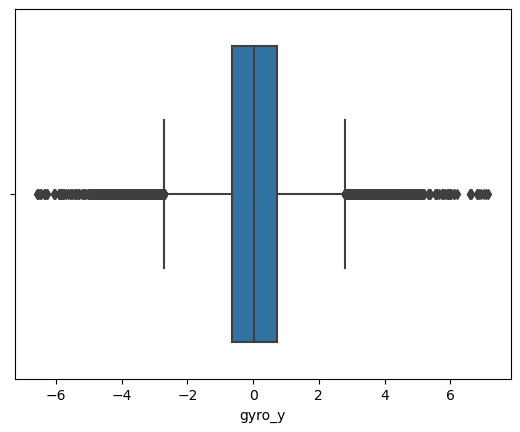

In [148]:
sns.boxplot(x=df.gyro_y)

## gyro_z

In [149]:
df.loc[df.gyro_z>7.9]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
60643,2017-7-2,19:44:42:472842991,viktor,0,1,0.0779,1.1976,-0.6989,-0.2000,3.4339,11.2662
72241,2017-7-6,18:47:33:610493004,viktor,0,1,2.4175,-1.1534,-1.7530,2.8293,-1.5507,8.0350


In [150]:
df.loc[df.gyro_z<-7.9]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
60641,2017-7-2,19:44:42:72026014,viktor,0,1,-0.3572,1.0598,-0.4366,-1.7009,2.4628,-9.48


In [151]:
np.median(df.gyro_z)

0.0069

In [152]:
df.loc[df.gyro_z>7.9,'gyro_z']=np.median(df.gyro_z)

In [153]:
df.loc[df.gyro_z<-7.9,'gyro_z']=np.median(df.gyro_z)

<Axes: xlabel='gyro_z'>

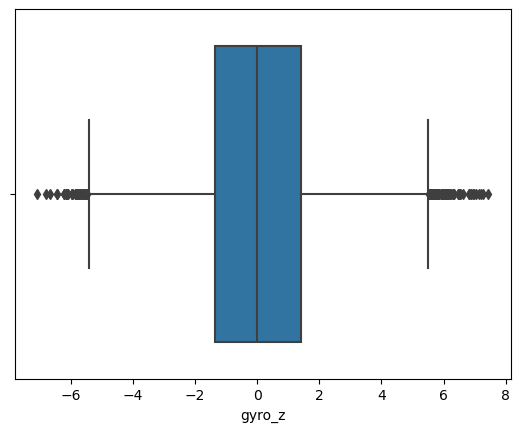

In [154]:
sns.boxplot(x=df.gyro_z)

In [155]:
df.activity.value_counts()

activity
1    44365
0    44223
Name: count, dtype: int64

### 3) Conversion of Categorical  data to Numrical  & Scaling of features 

In [156]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [157]:
lb=LabelEncoder()

In [158]:
ms=MinMaxScaler()

In [159]:
df.date=lb.fit_transform(df.date)

In [160]:
df.time=lb.fit_transform(df.time)

In [161]:
df.time

0         3280
1         3281
2         3282
3         3283
4         3284
         ...  
88583    87701
88584    87703
88585    87705
88586    87708
88587    87709
Name: time, Length: 88588, dtype: int32

In [162]:
df.date

0         0
1         0
2         0
3         0
4         0
         ..
88583    11
88584    11
88585    11
88586    11
88587    11
Name: date, Length: 88588, dtype: int32

In [163]:
df.time=ms.fit_transform(df[['time']])

In [164]:
df.time

0        0.037026
1        0.037037
2        0.037048
3        0.037060
4        0.037071
           ...   
88583    0.989999
88584    0.990021
88585    0.990044
88586    0.990078
88587    0.990089
Name: time, Length: 88588, dtype: float64

In [165]:
df.date=ms.fit_transform(df[['date']])

In [166]:
df.date

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
88583    1.0
88584    1.0
88585    1.0
88586    1.0
88587    1.0
Name: date, Length: 88588, dtype: float64

# Feature Selection

### 1)Dropping Redundant Column:

In [167]:
df.drop('username' ,axis=1,inplace=True)

In [168]:
df

,date,time,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.0,0.037026,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0.0,0.037037,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0.0,0.037048,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0.0,0.037060,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0.0,0.037071,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...
88583,1.0,0.989999,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,1.0,0.990021,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,1.0,0.990044,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,1.0,0.990078,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [169]:
df.drop('activity',axis=1).corr()

,date,time,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
date,1.000000,0.197195,-0.470160,0.291588,-0.016331,-0.201649,0.016620,0.048257,-0.004672
time,0.197195,1.000000,-0.318196,0.110347,0.471220,-0.159840,0.032614,0.023341,-0.007311
wrist,-0.470160,-0.318196,1.000000,-0.609672,0.086966,0.323549,-0.022135,-0.068378,0.008860
acceleration_x,0.291588,0.110347,-0.609672,1.000000,-0.264597,-0.551579,-0.021491,-0.004008,-0.060745
acceleration_y,-0.016331,0.471220,0.086966,-0.264597,1.000000,0.105851,0.009738,0.072331,-0.023370
acceleration_z,-0.201649,-0.159840,0.323549,-0.551579,0.105851,1.000000,0.035081,-0.021283,0.049511
gyro_x,0.016620,0.032614,-0.022135,-0.021491,0.009738,0.035081,1.000000,0.094035,0.317542
gyro_y,0.048257,0.023341,-0.068378,-0.004008,0.072331,-0.021283,0.094035,1.000000,0.287441
gyro_z,-0.004672,-0.007311,0.008860,-0.060745,-0.023370,0.049511,0.317542,0.287441,1.000000


## Finding Correlation  between Features

<Axes: >

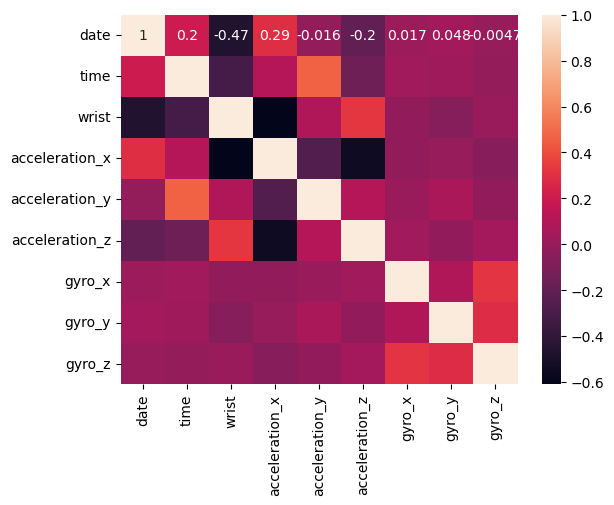

In [170]:
sns.heatmap(df.drop('activity',axis=1).corr(),annot=True)

#### There is no corrleation found between any two columns 

# Model Creation

In [171]:
x=df.drop('activity',axis=1)
x

,date,time,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.0,0.037026,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0.0,0.037037,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0.0,0.037048,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0.0,0.037060,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0.0,0.037071,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...
88583,1.0,0.989999,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,1.0,0.990021,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,1.0,0.990044,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,1.0,0.990078,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [172]:
y=df.activity
y

0        0
1        0
2        0
3        0
4        0
        ..
88583    0
88584    0
88585    0
88586    0
88587    0
Name: activity, Length: 88588, dtype: int64

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.24,random_state=42)

In [175]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(67326, 9)
(21262, 9)
(67326,)
(21262,)


## Logistics_Regression 

In [176]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [177]:
LR.fit(x_train,y_train)

LogisticRegression()

In [178]:
y_pred=LR.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [179]:
x_test

,date,time,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
57800,0.090909,0.518056,0,1.6815,-0.4641,-0.9647,0.2961,-1.5709,-1.6958
53690,0.545455,0.972569,1,-0.1132,0.4044,-0.2144,1.7535,-0.7964,3.5975
75294,0.818182,0.668439,0,2.2226,-1.8281,-2.2184,-0.1521,-0.3216,2.7630
16113,0.363636,0.524061,1,0.0571,0.5462,-0.1377,0.7485,0.0477,2.0552
88456,1.000000,0.992900,0,0.3597,-1.2908,-0.3557,-0.8036,-0.7982,-1.3781
...,...,...,...,...,...,...,...,...,...
9381,0.272727,0.463556,1,0.0208,-0.5043,0.2691,0.2225,-0.5957,-1.7486
11566,0.272727,0.488175,1,0.2325,-0.7076,0.2374,-1.2124,-0.1643,0.2289
86768,1.000000,0.933049,0,0.5972,-1.0141,-0.3522,0.7481,-0.4093,3.0925
2428,0.000000,0.943863,0,0.1522,0.5670,-0.1219,-0.8155,1.0935,-1.4262


In [180]:
y_test.values

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

# Model Evaluation

In [181]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report,f1_score

In [182]:
acc=accuracy_score(y_test,y_pred)
acc

0.9311917975731352

In [183]:
pr=precision_score(y_test,y_pred)
pr

0.9292060491493384

In [184]:
re=recall_score(y_test,y_pred)
re

0.9322901849217639

In [185]:
pd.crosstab(y_test,y_pred)

col_0,0,1
activity,,
0,9968,749
1,714,9831


In [186]:
f1_score(y_test,y_pred)

0.9307455621301773

In [187]:
roc_auc_score(y_test,y_pred)

0.9312006117293339

In [188]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10717
           1       0.93      0.93      0.93     10545

    accuracy                           0.93     21262
   macro avg       0.93      0.93      0.93     21262
weighted avg       0.93      0.93      0.93     21262



# Cross Validation

In [189]:
LR1=LogisticRegression()

In [190]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(LR1,x,y,scoring='f1',cv=5)
cv

array([0.88405874, 0.93716338, 0.96288121, 0.87786949, 0.88598527])

In [191]:
cv.mean()

0.9095916172368212

In [192]:
cv.std()

0.03410414331651516

# Hyperparameter tunning 

In [193]:
from sklearn.model_selection import GridSearchCV

In [194]:
LR2=LogisticRegression()

In [195]:
param_grid={'C':[0.1,1,10,100,1000],'tol':[0.00001,0.0001,0.001,0.01,0.1]}

In [196]:
grid=GridSearchCV(LR2,param_grid,scoring='f1',cv=5,verbose=3)

In [197]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..................C=0.1, tol=1e-05;, score=0.926 total time=   0.2s
[CV 2/5] END ..................C=0.1, tol=1e-05;, score=0.929 total time=   0.2s
[CV 3/5] END ..................C=0.1, tol=1e-05;, score=0.932 total time=   0.2s
[CV 4/5] END ..................C=0.1, tol=1e-05;, score=0.930 total time=   0.2s
[CV 5/5] END ..................C=0.1, tol=1e-05;, score=0.927 total time=   0.2s
[CV 1/5] END .................C=0.1, tol=0.0001;, score=0.926 total time=   0.2s
[CV 2/5] END .................C=0.1, tol=0.0001;, score=0.929 total time=   0.2s
[CV 3/5] END .................C=0.1, tol=0.0001;, score=0.932 total time=   0.2s
[CV 4/5] END .................C=0.1, tol=0.0001;, score=0.930 total time=   0.2s
[CV 5/5] END .................C=0.1, tol=0.0001;, score=0.927 total time=   0.2s
[CV 1/5] END ..................C=0.1, tol=0.001;, score=0.926 total time=   0.2s
[CV 2/5] END ..................C=0.1, tol=0.001

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1]},
             scoring='f1', verbose=3)

In [198]:
grid.best_params_

{'C': 1, 'tol': 1e-05}

In [199]:
grid.best_estimator_

LogisticRegression(C=1, tol=1e-05)

In [200]:
LR3=LogisticRegression(C= 0.1, tol=1e-05)

In [201]:
LR3.fit(x_train,y_train)

LogisticRegression(C=0.1, tol=1e-05)

In [202]:
y_pred1=LR3.predict(x_test)
y_pred1

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [203]:
y_test.values

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

## Model Evaluation of LogisticRegression

## Testing

In [204]:
accuracy_score(y_test,y_pred1)

0.9310977330448688

In [205]:
precision_score(y_test,y_pred1)

0.9293550217514659

In [206]:
recall_score(y_test,y_pred1)

0.9319108582266477

In [207]:
roc_auc_score(y_test,y_pred1)

0.9311042580766532

In [208]:
pd.crosstab(y_test,y_pred1)

col_0,0,1
activity,,
0,9970,747
1,718,9827


In [209]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10717
           1       0.93      0.93      0.93     10545

    accuracy                           0.93     21262
   macro avg       0.93      0.93      0.93     21262
weighted avg       0.93      0.93      0.93     21262



In [210]:
f1_score(y_test,y_pred1)

0.9306311851886927

## Training

In [211]:
y_pred_lrhtr=LR3.predict(x_train)

In [212]:
accuracy_score(y_train,y_pred_lrhtr)

0.9286159878798681

In [213]:
f1_score(y_train,y_pred_lrhtr)

0.9290354970173055

In [214]:
recall_score(y_train,y_pred_lrhtr)

0.9301892371377883

In [215]:
precision_score(y_train,y_pred_lrhtr)

0.9278846153846154

In [216]:
pd.crosstab(y_train,y_pred_lrhtr)

col_0,0,1
activity,,
0,31061,2445
1,2361,31459


In [217]:
roc_auc_score(y_train,y_pred_lrhtr)

0.9286086160618805

## SVM

In [218]:
from sklearn.svm import SVC

In [219]:
sv=SVC()

In [220]:
sv.fit(x_train,y_train)

SVC()

In [221]:
y_pred_sv=sv.predict(x_test)
y_pred_sv

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [222]:
y_test.values

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [223]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report,f1_score

In [224]:
f1_score(y_test,y_pred_sv)

0.9929764616552771

In [225]:
acc_sv=accuracy_score(y_test,y_pred_sv)
acc

0.9311917975731352

In [226]:
recall_score(y_test,y_pred_sv)

0.9921289710763395

In [227]:
precision_score(y_test,y_pred_sv)

0.9938254013489123

In [228]:
pd.crosstab(y_test,y_pred_sv)

col_0,0,1
activity,,
0,10652,65
1,83,10462


In [229]:
roc_auc_score(y_test,y_pred_sv)

0.9930319204546576

In [230]:
y_pred_sv1=sv.predict(x_train)
y_pred_sv1

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [231]:
accuracy_score(y_train,y_pred_sv1)

0.9931230133974988

In [232]:
from collections import Counter
print(Counter(y_train))

Counter({1: 33820, 0: 33506})


## Cross Validation

In [233]:
sv1=SVC()

In [234]:
from sklearn.model_selection import cross_val_score

In [235]:
cv=cross_val_score(sv1,x,y,scoring='f1',cv=2)
cv

array([0.96961885, 0.96043333])

## Hyperparameter Tunning

In [236]:
from sklearn.model_selection import RandomizedSearchCV # grid is best option but it takes huge time 

In [237]:
sv2=SVC()

In [238]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[0.00001,0.0001,0.001,0.01,0.1]}

In [239]:
grid=RandomizedSearchCV(sv2,param_grid,scoring='f1',cv=2,verbose=3)

In [240]:
grid.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END ..................C=1, gamma=0.001;, score=0.941 total time= 2.5min
[CV 2/2] END ..................C=1, gamma=0.001;, score=0.941 total time= 2.6min
[CV 1/2] END ..................C=100, gamma=0.1;, score=0.996 total time=  10.1s
[CV 2/2] END ..................C=100, gamma=0.1;, score=0.996 total time=  10.1s
[CV 1/2] END ..................C=10, gamma=0.01;, score=0.982 total time=  41.5s
[CV 2/2] END ..................C=10, gamma=0.01;, score=0.983 total time=  40.0s
[CV 1/2] END .................C=0.1, gamma=0.01;, score=0.954 total time= 2.3min
[CV 2/2] END .................C=0.1, gamma=0.01;, score=0.955 total time= 2.3min
[CV 1/2] END ................C=10, gamma=0.0001;, score=0.928 total time= 2.8min
[CV 2/2] END ................C=10, gamma=0.0001;, score=0.928 total time= 3.0min
[CV 1/2] END ................C=0.1, gamma=1e-05;, score=0.669 total time= 7.6min
[CV 2/2] END ................C=0.1, gamma=1e-05;

RandomizedSearchCV(cv=2, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1]},
                   scoring='f1', verbose=3)

In [241]:
grid.best_params_

{'gamma': 0.1, 'C': 1000}

In [242]:
grid.best_estimator_

SVC(C=1000, gamma=0.1)

In [243]:
sv3=SVC(C=1000,gamma=0.1)

In [244]:
sv3

SVC(C=100, gamma=0.1)

In [245]:
sv3.fit(x_train,y_train)

SVC(C=100, gamma=0.1)

In [246]:
y_pred_h=sv3.predict(x_test)
y_pred_h

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [247]:
y_test.values

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

## Model Evaluation of SVM

## Testing

In [248]:
accuracy_score(y_test,y_pred_h)

0.9973191609444079

In [249]:
recall_score(y_test,y_pred_h)

0.9963963963963964

In [250]:
precision_score(y_test,y_pred_h)

0.9981949458483754

In [251]:
f1_score(y_test,y_pred_h)

0.9972948602344455

In [252]:
pd.crosstab(y_test,y_pred_h)

col_0,0,1
activity,,
0,10698,19
1,38,10507


In [253]:
roc_auc_score(y_test,y_pred_h)

0.997311756096864

## Training

In [254]:
y_pred_svtr=sv3.predict(x_train)

In [255]:
accuracy_score(y_train,y_pred_svtr)

0.9981433621483528

In [256]:
f1_score(y_train,y_pred_svtr)

0.9981514071488783

In [257]:
recall_score(y_train,y_pred_svtr)

0.9978415138971023

In [258]:
precision_score(y_train,y_pred_svtr)

0.9984614929435782

In [259]:
pd.crosstab(y_train,y_pred_svtr)

col_0,0,1
activity,,
0,33454,52
1,73,33747


In [260]:
roc_auc_score(y_train,y_pred_svtr)

0.9981447765271342

# Decision Tree

In [261]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [262]:
y_pred_dt=dt.predict(x_test)
y_pred_dt

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [263]:
y_test.values

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [264]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report,f1_score

In [265]:
accuracy_score(y_test,y_pred_dt)

0.9947794186812153

In [266]:
precision_score(y_test,y_pred_dt)

0.9943149516770893

In [267]:
recall_score(y_test,y_pred_dt)

0.9951635846372688

In [268]:
f1_score(y_test,y_pred_dt)

0.994739087160529

In [269]:
roc_auc_score(y_test,y_pred_dt)

0.9947825014723155

In [270]:
pd.crosstab(y_test,y_pred_dt)

col_0,0,1
activity,,
0,10657,60
1,51,10494


In [271]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     10717
           1       0.99      1.00      0.99     10545

    accuracy                           0.99     21262
   macro avg       0.99      0.99      0.99     21262
weighted avg       0.99      0.99      0.99     21262



## Cross Validation

In [272]:
from sklearn.model_selection import cross_val_score
dt1=DecisionTreeClassifier()

In [273]:
cv=cross_val_score(dt1,x,y,scoring='f1',cv=4)
cv

array([0.80657678, 0.99592613, 0.94921838, 0.8778632 ])

## Hyperparameter Tunning

In [274]:
from sklearn.model_selection import RandomizedSearchCV

In [275]:
list(range(1, 20))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [276]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20))
}

In [277]:
dt2 = DecisionTreeClassifier()

In [278]:
grid = RandomizedSearchCV(dt2 ,params, scoring='f1', cv =4, verbose = 3, n_jobs=-1)

In [279]:
grid.fit(x_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19],
                                        'min_samples_split': [2, 3, 4],
                                        'splitter': ('best', 'random')},
                   scoring='f1', verbose=3)

In [280]:
grid.best_params_

{'splitter': 'best',
 'min_samples_split': 3,
 'min_samples_leaf': 7,
 'max_depth': 19,
 'criterion': 'entropy'}

In [281]:
grid.best_score_

0.9961564347687533

In [282]:
dt3=DecisionTreeClassifier()
dt3

DecisionTreeClassifier()

In [283]:
dt3.fit(x_train,y_train)
dt3

DecisionTreeClassifier()

In [284]:
y_pred_hdt=dt3.predict(x_test)
y_pred_hdt

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [285]:
y_test.values

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

## Model Evaluation of Decision Tree

## Testing

In [286]:
accuracy_score(y_test,y_pred_hdt)

0.9949675477377481

In [287]:
f1_score(y_test,y_pred_hdt)

0.9949267460054052

In [288]:
recall_score(y_test,y_pred_hdt)

0.9949739212897107

In [289]:
precision_score(y_test,y_pred_hdt)

0.9948795751943865

In [290]:
pd.crosstab(y_test,y_pred_hdt)

col_0,0,1
activity,,
0,10663,54
1,53,10492


In [291]:
roc_auc_score(y_test,y_pred_hdt)

0.9949675988831682

## Training

In [292]:
y_pred_hdt_tr=dt3.predict(x_train)

In [293]:
accuracy_score(y_train,y_pred_hdt_tr)

1.0

In [294]:
f1_score(y_train,y_pred_hdt_tr)

1.0

In [295]:
recall_score(y_train,y_pred_hdt_tr)

1.0

In [296]:
precision_score(y_train,y_pred_hdt_tr)

1.0

In [297]:
pd.crosstab(y_train,y_pred_hdt_tr)

col_0,0,1
activity,,
0,33506,0
1,0,33820


In [298]:
roc_auc_score(y_train,y_pred_hdt_tr)

1.0

# Random Forest

In [299]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200)

In [300]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [301]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [302]:
y_test.values

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [303]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report,f1_score

In [304]:
accuracy_score(y_test,y_pred_rf)

0.9987771611325369

In [305]:
precision_score(y_test,y_pred_rf)

0.9982002462820877

In [306]:
recall_score(y_test,y_pred_rf)

0.9993361782835467

In [307]:
roc_auc_score(y_test,y_pred_rf)

0.9987816470404389

In [308]:
f1_score(y_test,y_pred_rf)

0.9987678892995925

In [309]:
pd.crosstab(y_test,y_pred_rf)

col_0,0,1
activity,,
0,10698,19
1,7,10538


In [310]:
y_pred_rf1=rf.predict(x_train)
y_pred_rf1

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [311]:
accuracy_score(y_train,y_pred_rf1)

1.0

In [312]:
recall_score(y_train,y_pred_rf1)

1.0

# cross validation

In [313]:
from sklearn.model_selection import cross_val_score

In [314]:
rf1 = RandomForestClassifier()

In [315]:
cv = cross_val_score(rf1,x,y,scoring='f1',cv=2)
cv

array([0.90462231, 0.94671475])

In [316]:
cv.mean()

0.9256685319993918

In [317]:
cv.std()

0.02104622013991375

# hyperparameter tunning

In [318]:
from sklearn.model_selection import RandomizedSearchCV


In [319]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
n_estimators

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [320]:
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

In [321]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False] 

In [322]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [323]:
rf2 = RandomForestClassifier(random_state=42)

In [324]:
rscv = RandomizedSearchCV(estimator=rf2, scoring='f1',param_distributions=random_grid, n_iter=20, cv=2, 
                               verbose=2, random_state=42, n_jobs=-1)

In [325]:
rscv.fit(x_train,y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

In [326]:
y_pred_rfhte=rscv.predict(x_test)

## Model Evaluation of Random Forest

## Testing

In [327]:
accuracy_score(y_test,y_pred_rfhte)

0.9989182579249365

In [328]:
recall_score(y_test,y_pred_rfhte)

0.9995258416311048

In [329]:
f1_score(y_test,y_pred_rfhte)

0.9989101075676443

In [330]:
precision_score(y_test,y_pred_rfhte)

0.9982951316537223

In [331]:
pd.crosstab(y_test,y_pred_rfhte)

col_0,0,1
activity,,
0,10699,18
1,5,10540


In [332]:
roc_auc_score(y_test,y_pred_rfhte)

0.9989231335616567

## Training

In [335]:
y_pred_rfhtr=rscv.predict(x_train)

In [336]:
accuracy_score(y_train,y_pred_rfhtr)

1.0

In [337]:
recall_score(y_train,y_pred_rfhtr)

1.0

In [338]:
f1_score(y_train,y_pred_rfhtr)

1.0

In [339]:
precision_score(y_train,y_pred_rfhtr)

1.0

In [340]:
pd.crosstab(y_train,y_pred_rfhtr)

col_0,0,1
activity,,
0,33506,0
1,0,33820


In [341]:
roc_auc_score(y_train,y_pred_rfhtr)

1.0

# KNN

In [342]:
from sklearn.neighbors import KNeighborsClassifier

In [343]:
Er=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred_knn=knn.predict(x_test)
    error=(y_test !=y_pred_knn).sum()/len(y_test)
    Er.append(error)

In [344]:
Er

[0.005032452262251905,
 0.007101871884112501,
 0.0048913554698523185,
 0.006020129809049007,
 0.00569090396011664,
 0.006443420186247766,
 0.005973097544915812,
 0.006725613771046938,
 0.006255291129714985,
 0.007195936412378892]

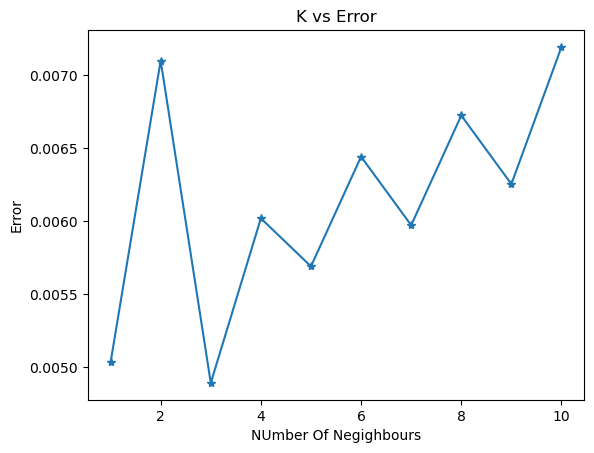

In [345]:
plt.plot(range(1,11),Er,marker='*')
plt.xlabel('NUmber Of Negighbours')
plt.ylabel('Error')
plt.title('K vs Error')
plt.show()

In [346]:

knn=KNeighborsClassifier(n_neighbors=3)

In [347]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [348]:
y_pred_knn=knn.predict(x_test)
y_pred_knn

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [349]:
y_test.values

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [350]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report,f1_score

In [351]:
accuracy_score(y_test,y_pred_knn)

0.9951086445301477

In [352]:
recall_score(y_test,y_pred_knn)

0.9927927927927928

In [353]:
precision_score(y_test,y_pred_knn)

0.9973325712108222

In [354]:
f1_score(y_test,y_pred_knn)

0.99505750403954

In [355]:
roc_auc_score(y_test,y_pred_knn)

0.9950900606681143

## Cross validation

In [356]:
from sklearn.model_selection import cross_val_score

In [357]:
knn1=KNeighborsClassifier()

In [358]:
cv=cross_val_score(knn1,x,y,cv=5,scoring='f1')
cv

array([0.99043414, 0.99627077, 0.9835146 , 0.941381  , 0.97836218])

In [359]:
cv.mean()

0.9779925368752709

In [360]:
cv.std()

0.0192868963909142

## Hyperparameter Tunning

In [361]:
from sklearn.model_selection import GridSearchCV

In [362]:
knn2=KNeighborsClassifier()

In [363]:
param_grid_knn={'n_neighbors':[3,5,7,9],'weights':['unifrom','distance'],'metric':['euclidean','manhattan']}

In [364]:
grid_knn=GridSearchCV(knn2,param_grid_knn,scoring='f1',cv=5,verbose=3)

In [365]:
grid_knn.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=unifrom;, score=nan total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=unifrom;, score=nan total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=unifrom;, score=nan total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=unifrom;, score=nan total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=unifrom;, score=nan total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.992 total time=   0.5s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.993 total time=   0.3s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.994 total time=   0.4s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.993 total time=   0.4s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.994 total time=  

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['unifrom', 'distance']},
             scoring='f1', verbose=3)

In [366]:
grid_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [367]:
grid_knn.best_estimator_

KNeighborsClassifier(metric='manhattan', weights='distance')

In [368]:
knn3=KNeighborsClassifier(metric='manhattan', weights='distance')

In [369]:
knn3.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [370]:
y_pred_knn_h=knn3.predict(x_test)
y_pred_knn_h

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

## Model Evaluation of KNN

### Testing 

In [371]:
accuracy_score(y_test,y_pred_knn_h)

0.9962374188693444

In [372]:
recall_score(y_test,y_pred_knn_h)

0.9937411095305833

In [373]:
f1_score(y_test,y_pred_knn_h)

0.9961973571632284

In [374]:
precision_score(y_test,y_pred_knn_h)

0.9986657771847899

In [375]:
pd.crosstab(y_test,y_pred_knn_h)

col_0,0,1
activity,,
0,10703,14
1,66,10479


In [376]:
roc_auc_score(y_test,y_pred_knn_h)

0.9962173869011506

### Training

In [377]:
y_pred_knnhtr=knn3.predict(x_train)
y_pred_knnhtr

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [378]:
accuracy_score(y_train,y_pred_knnhtr)

1.0

In [379]:
recall_score(y_train,y_pred_knnhtr)

1.0

In [380]:
f1_score(y_train,y_pred_knnhtr)

1.0

In [381]:
precision_score(y_train,y_pred_knnhtr)

1.0

In [382]:
pd.crosstab(y_train,y_pred_knnhtr)

col_0,0,1
activity,,
0,33506,0
1,0,33820


In [383]:
roc_auc_score(y_train,y_pred_knnhtr)

1.0

# XGBoost

In [384]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier() ## object creation
gbm.fit(x_train,y_train) ## fitting the data

GradientBoostingClassifier()

In [385]:
y_gbm = gbm.predict(x_test)#predicting the price
y_gbm

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [386]:
y_gbm_train = gbm.predict(x_train)

In [387]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report# to check model performance
accu_scor = accuracy_score(y_test,y_gbm)
accu_scor

0.9981657416988053

In [388]:
precision_score(y_test,y_gbm)

0.99753741238871

In [389]:
recall_score(y_test,y_gbm)

0.9987671882408724

In [390]:
f1_score(y_test,y_gbm)

0.9981519215277448

In [391]:
roc_auc_score(y_test,y_gbm)

0.9981705680870312

In [392]:
accu_scor_train = accuracy_score(y_train, y_gbm_train)
accu_scor_train

0.99841071799899

In [394]:
print(classification_report(y_train, y_gbm_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33506
           1       1.00      1.00      1.00     33820

    accuracy                           1.00     67326
   macro avg       1.00      1.00      1.00     67326
weighted avg       1.00      1.00      1.00     67326



In [395]:
pd.crosstab(y_train, y_gbm_train)

col_0,0,1
activity,,
0,33447,59
1,48,33772


## Cross Validation

In [396]:
from sklearn.model_selection import cross_val_score

In [397]:
gbm1=GradientBoostingClassifier()

In [398]:
cv=cross_val_score(gbm1,x,y,cv=5,scoring='f1')
cv

array([0.78833282, 0.99932333, 0.96045926, 0.96639399, 0.9581001 ])

In [399]:
cv.mean()

0.9345219006526415

In [400]:
cv.std()

0.0745854953238635

## Hyperparameter Tunning

In [401]:
from sklearn.model_selection import GridSearchCV

In [402]:
gbm2=GradientBoostingClassifier()

In [403]:
param_grid_xgb= {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

In [404]:
grid=GridSearchCV(gbm2,param_grid_xgb,scoring='f1',cv=5,verbose=3)

In [405]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=0.998 total time=  11.1s
[CV 2/5] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=0.998 total time=  10.7s
[CV 3/5] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=0.997 total time=  11.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=0.997 total time=  10.5s
[CV 5/5] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=0.998 total time=  10.8s
[CV 1/5] END learning_rate=0.1, max_depth=3, subsample=0.7;, score=0.997 total time=  14.4s
[CV 2/5] END learning_rate=0.1, max_depth=3, subsample=0.7;, score=0.998 total time=  14.1s
[CV 3/5] END learning_rate=0.1, max_depth=3, subsample=0.7;, score=0.997 total time=  14.2s
[CV 4/5] END learning_rate=0.1, max_depth=3, subsample=0.7;, score=0.998 total time=  14.2s
[CV 5/5] END learning_rate=0.1, max_depth=3, subsample=0.7;, score=0.998 total time=  14.0s
[CV 1/5] END learn

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'subsample': [0.5, 0.7, 1]},
             scoring='f1', verbose=3)

In [406]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 1}

In [407]:
grid.best_estimator_

GradientBoostingClassifier(max_depth=7, subsample=1)

In [408]:
gbm3=GradientBoostingClassifier(max_depth=7, subsample=1)

In [409]:
gbm3.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=7, subsample=1)

In [410]:
y_pred_gbm_hte=gbm3.predict(x_test)
y_pred_gbm_hte

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [411]:
y_test.values

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

## Testing

In [412]:
accuracy_score(y_test,y_pred_gbm_hte)

0.9996237418869345

In [413]:
recall_score(y_test,y_pred_gbm_hte)

0.9998103366524419

In [414]:
f1_score(y_test,y_pred_gbm_hte)

0.999620745235612

In [415]:
precision_score(y_test,y_pred_gbm_hte)

0.999431225708598

In [416]:
pd.crosstab(y_test,y_pred_gbm_hte)

col_0,0,1
activity,,
0,10711,6
1,2,10543


In [417]:
roc_auc_score(y_test,y_pred_gbm_hte)

0.9996252392415891

## Training

In [418]:
y_pred_gbm_htr=gbm3.predict(x_train)
y_pred_gbm_htr

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [419]:
accuracy_score(y_train,y_pred_gbm_htr)

1.0

In [420]:
recall_score(y_train,y_pred_gbm_htr)

1.0

In [421]:
precision_score(y_train,y_pred_gbm_htr)

1.0

In [422]:
f1_score(y_train,y_pred_gbm_htr)

1.0

In [423]:
pd.crosstab(y_train,y_pred_gbm_htr)

col_0,0,1
activity,,
0,33506,0
1,0,33820


In [424]:
roc_auc_score(y_train,y_pred_gbm_htr)

1.0

# Bagging

In [425]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()

In [426]:
bc.fit(x_train,y_train)
bc

BaggingClassifier()

In [427]:
y_pred_bc=bc.predict(x_test)
y_pred_bc

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [428]:
y_test.values

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [429]:
accuracy_score(y_pred_bc,y_test)

0.9967077415106763

In [430]:
f1_score(y_test,y_pred_bc)

0.9966824644549763

In [431]:
precision_score(y_test,y_pred_bc)

0.9962103268593084

In [432]:
recall_score(y_test,y_pred_bc)

0.9971550497866287

In [433]:
roc_auc_score(y_test,y_pred_bc)

0.9967113309957685

In [434]:
import pandas as pd

In [443]:
d1 = {'Algorithm Name':['Logistic_regrssion','SVM','KNN','Decision_tree','Random_forest','XGBoost','Bagging'],
     'accuracy_score':[0.9311,0.9311,0.9951,0.9946,0.9987,0.9981,0.9965],
     'precision_scroe':[0.9292,0.9938,0.9973,0.9945,0.9980,0.9975,0.9959],
     'recall_score':[0.9322,0.9921,0.9927,0.9946,0.9995,0.9987,0.9970],
     'F1_score':[0.9307,0.9929,0.9950,0.9946,0.9987,0.9981,0.9964],
     'roc_uc_score':[0.9312,0.9930,0.9950,0.9946,0.9987,0.9981,0.9965]}

## Without Hyperparameter Tunning

In [444]:
pd.DataFrame(d1)

,Algorithm Name,accuracy_score,precision_scroe,recall_score,F1_score,roc_uc_score
0,Logistic_regrssion,0.9311,0.9292,0.9322,0.9307,0.9312
1,SVM,0.9311,0.9938,0.9921,0.9929,0.9930
2,KNN,0.9951,0.9973,0.9927,0.9950,0.9950
3,Decision_tree,0.9946,0.9945,0.9946,0.9946,0.9946
4,Random_forest,0.9987,0.9980,0.9995,0.9987,0.9987
5,XGBoost,0.9981,0.9975,0.9987,0.9981,0.9981
6,Bagging,0.9965,0.9959,0.9970,0.9964,0.9965


# With Hyperparameter Tunning

In [445]:
d2 = {'Algorithm Name':['Logistic_regrssion','SVM','KNN','Decision_tree','Random_forest','XGBoost','Bagging'],
     'accuracy_score':[0.9310977330448688,0.9973191609444079,0.9962374188693444,0.9949675477377481,0.9989182579249365,0.9996237418869345,0.9967077415106763],
     'precision_scroe':[0.9293550217514659,0.9973191609444079,0.9986657771847899,0.9948795751943865,0.9982951316537223,0.999431225708598,0.9967077415106763],
     'recall_score':[0.9319108582266477,0.9963963963963964,0.9937411095305833,0.9949739212897107,0.9995258416311048,0.9998103366524419,0.9971550497866287],
     'F1_score':[0.9307455621301773,0.9972948602344455,0.9961973571632284,0.9949267460054052,0.9989101075676443,0.999620745235612,0.9966824644549763],
     'roc_uc_score':[0.9311042580766532,0.997311756096864,0.9962173869011506,0.9948795751943865,0.9982951316537223,0.99753741238871,0.9967113309957685]}

In [446]:
pd.DataFrame(d2)

,Algorithm Name,accuracy_score,precision_scroe,recall_score,F1_score,roc_uc_score
0,Logistic_regrssion,0.931098,0.929355,0.931911,0.930746,0.931104
1,SVM,0.997319,0.997319,0.996396,0.997295,0.997312
2,KNN,0.996237,0.998666,0.993741,0.996197,0.996217
3,Decision_tree,0.994968,0.994880,0.994974,0.994927,0.994880
4,Random_forest,0.998918,0.998295,0.999526,0.998910,0.998295
5,XGBoost,0.999624,0.999431,0.999810,0.999621,0.997537
6,Bagging,0.996708,0.996708,0.997155,0.996682,0.996711




### Model Performance Insights

1. **Top Performing Models**:
   - **XGBoost**: With an accuracy score of 0.9996 and a corresponding F1 score of 0.9996, XGBoost stands out as the best-performing model.
     Its high precision (0.9994) and recall (0.9998) indicate it effectively balances the identification of both classes, minimizing both false positives and false negatives.   
   - **Random Forest**: Close behind, Random Forest achieves an accuracy of 0.9989 and an F1 score of 0.9989. Its performance metrics reflect its capability in handling the classification task robustly.    

2. **Solid Performance of Other Models**:    
   - **SVM** and **KNN** deliver respectable results, with accuracy scores around 0.9973 and 0.9962, respectively. While they perform well, they are slightly less effective than the tree-based methods, particularly in terms of the F1 score and precision.      

3. **Logistic Regression**: This model, with the lowest accuracy (0.9311), indicates that it may not be well-suited for the complexity of this dataset. It struggles to effectively separate the two classes compared to the more sophisticated models.     

### Implications of Hyperparameter Tuning      

Since hyperparameter tuning has already been conducted, the observed performance metrics suggest that the models are optimally configured for this specific dataset. This tuning has likely maximized their ability to learn from the features provided, making them well-prepared for deployment in real-world scenarios.     

### Recommendations for Implementation

1. **Model Selection**: XGBoost and Random Forest are highly recommended for practical use in this application due to their outstanding predictive capabilities.         

2. **Real-time Application**: With the high accuracy and efficiency of these models, they could be integrated into real-time systems, such as fitness trackers or health monitoring devices, to accurately classify user activity.      

3. **Monitoring and Maintenance**: It’s essential to continuously monitor the models’ performance as new data comes in. Periodic retraining may be necessary to maintain accuracy, especially if user behavior patterns change over time.       

4. **Feature Importance Analysis**: Conduct a feature importance analysis to identify which sensor readings contribute most to the model's predictions. This can guide future data collection efforts and help in refining the model.      

### Conclusion     

The hyperparameter tuning has enhanced the models’ performance, particularly for XGBoost and Random Forest, making them exceptional choices for classifying walking versus running based on sensor data. Their high accuracy, precision, and recall indicate readiness for deployment in practical applications.     